In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
X = np.arange(-64, 64)
X = X.reshape(16, 8)
x = np.linspace(-10, 10, 1000)
X

array([[-64, -63, -62, -61, -60, -59, -58, -57],
       [-56, -55, -54, -53, -52, -51, -50, -49],
       [-48, -47, -46, -45, -44, -43, -42, -41],
       [-40, -39, -38, -37, -36, -35, -34, -33],
       [-32, -31, -30, -29, -28, -27, -26, -25],
       [-24, -23, -22, -21, -20, -19, -18, -17],
       [-16, -15, -14, -13, -12, -11, -10,  -9],
       [ -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4,   5,   6,   7],
       [  8,   9,  10,  11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63]])

In [5]:
def Plot(x, y, name, xlim = [-1.5, 1.5], ylim = [-1, 2], x_label='$x$', y_label='$y$'):
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], colors='black', linewidth=1)
    plt.vlines(x=0, ymin=ylim[0], ymax=ylim[1], colors='black', linewidth=1)

    plt.plot(x, y, label=name)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.grid()
    plt.legend()


# Activation functions

## ReLU

$ReLU(x) = \max(0, x)$

In [6]:
def relu(x: np.ndarray):
    return np.maximum(0, x)

In [7]:
%%timeit -r 4
relu(X)

2.28 µs ± 54.1 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [8]:
relu(X)

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

### Graph

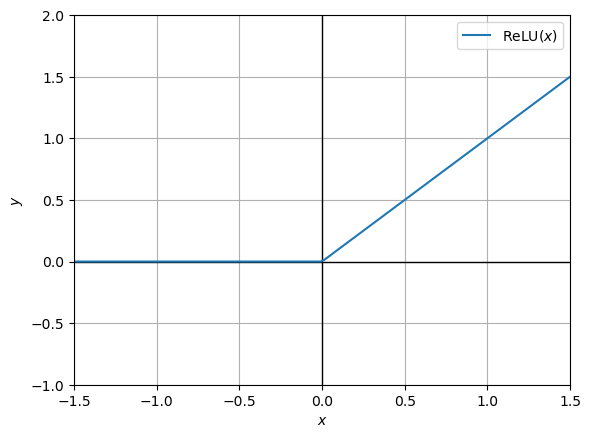

In [9]:
Plot(x, relu(x), 'ReLU$(x)$')

### Derivative

$ReLU'(z) = \begin{cases} 0, z < 0\\ 1, z > 0  \end{cases}$

In [10]:
def relu_derivative(x: np.ndarray):
    return (x >= 0).astype(np.float64)

In [11]:
%%timeit -r 4
relu_derivative(X)

4.48 µs ± 217 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [12]:
relu_derivative(X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

### Graph

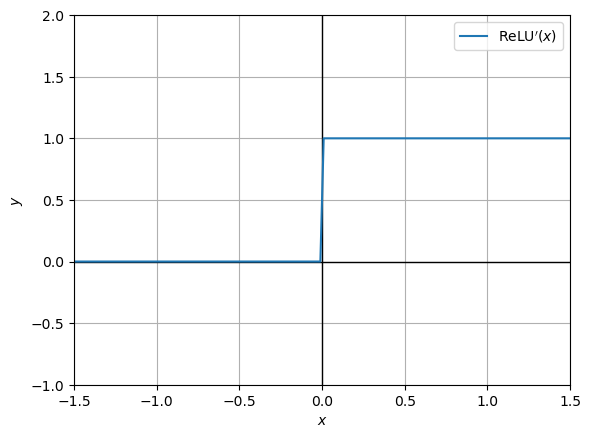

In [13]:
Plot(x, relu_derivative(x), "ReLU$'(x)$")

## ReLU6

$ReLU6(x) = min(max(0, x), 6)$

In [14]:
def relu6(z: np.ndarray):
    return np.minimum(np.maximum(0, z), 6)

In [15]:
%%timeit -r 4
relu6(X)

4.01 µs ± 17.1 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [16]:
relu6(X)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6]])

### Graph

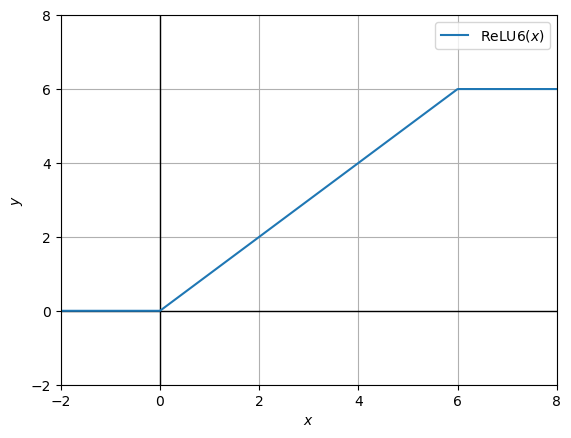

In [17]:
Plot(x, relu6(x), "ReLU6$(x)$", xlim=[-2, 8], ylim=[-2, 8])

### Derivative

In [18]:
def relu6_derivative(x: np.ndarray):
    return ((x >= 0) & (x <= 6)).astype(np.float64)

In [19]:
%%timeit -r 4
relu6_derivative(X)

7.35 µs ± 386 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [20]:
relu6_derivative(X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

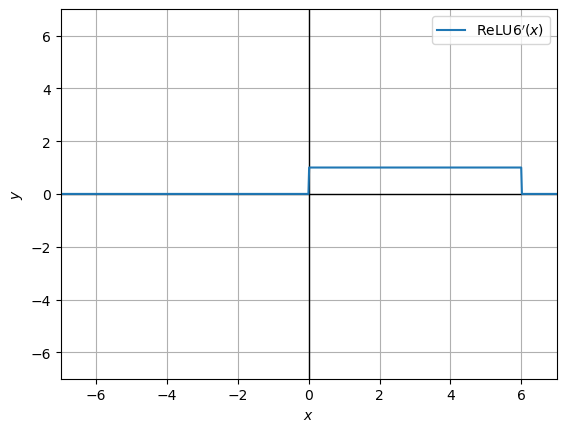

In [21]:
Plot(x, relu6_derivative(x), "ReLU6$'(x)$", xlim=[-7, 7], ylim=[-7, 7])

## SiLU

$SiLU(x) = x \sigma (x)$

In [22]:
def silu(x: np.ndarray):
    return x * 1 / (1 + np.exp(-x))

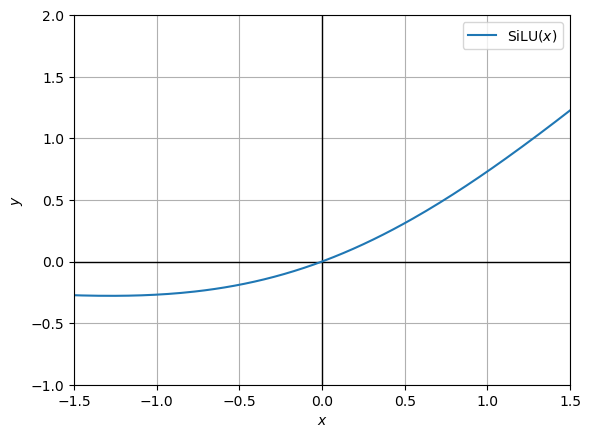

In [23]:
Plot(x, silu(x), "SiLU$(x)$")

### Derivative

$\text{SiLU}'(x) = \sigma (x) (1+x(1-\sigma (x)))$

In [24]:
def silu_derivative(x: np.ndarray):
    sigm = 1/(1+np.exp(-x))
    return sigm * (1 + x * (1 - sigm))

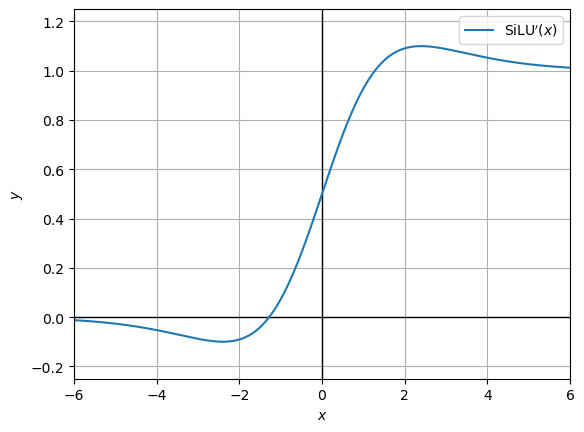

In [25]:
Plot(x, silu_derivative(x), "SiLU$'(x)$", xlim=[-6, 6], ylim=[-0.25, 1.25])

## GeLU

$$GeLU(x) = \frac{1}{2}x\left[1+erf\left(\frac{x}{\sqrt{2}}\right)\right] \approx 0.5x\left(1+\tanh\left(\sqrt{\frac{2}{\pi}}(x++0.044715x^3)\right)\right)$$

In [26]:
def gelu(x: np.ndarray):
    return x * 0.5 * (1.0 + torch.erf(torch.tensor(x) / np.sqrt(2.0))).numpy()

In [27]:
%%timeit -r 5
gelu(X)

119 µs ± 34.5 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [28]:
# def gelu_approx(x: np.ndarray):
#     return x / (1 + np.exp(-1.702*x))

In [29]:
def gelu_approx(x: np.ndarray):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x ** 3)))

In [30]:
%%timeit -r 5
gelu_approx(X)

27.2 µs ± 1.75 µs per loop (mean ± std. dev. of 5 runs, 10,000 loops each)


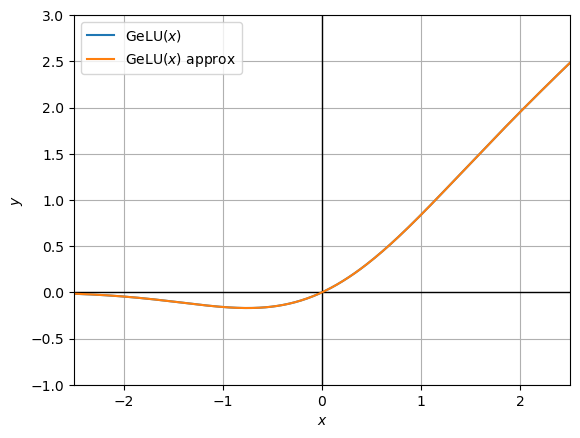

In [31]:
plt.plot(x, gelu(x), label="GeLU$(x)$")
Plot(x, gelu_approx(x), "GeLU$(x)$ approx", xlim=[-2.5, 2.5], ylim=[-1, 3])



### Derivative

In [32]:
def gelu_derivative(x):
    return 0.5 * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x / np.power(np.cosh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))), 2) * np.sqrt(2/np.pi) * (1 + 3 * 0.044715 * np.power(x, 2))

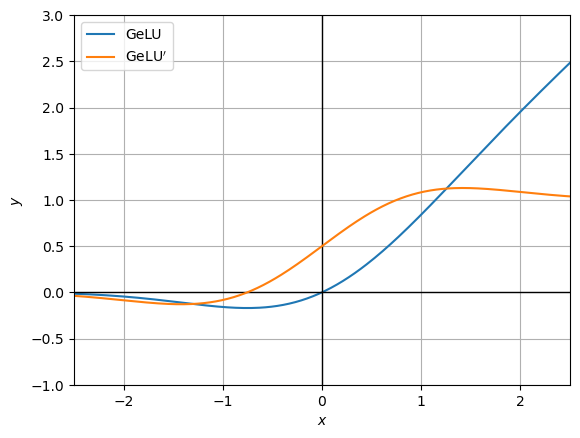

In [33]:
plt.plot(x, gelu_approx(x), label="GeLU")
Plot(x, gelu_derivative(x), "GeLU$'$", xlim=[-2.5, 2.5], ylim=[-1, 3])

## Softplus

$$ \text{Softplus}: f(x) = \log(1 + e^x) $$

In [34]:
def softplus(x):
    return np.log(1 + np.exp(x))

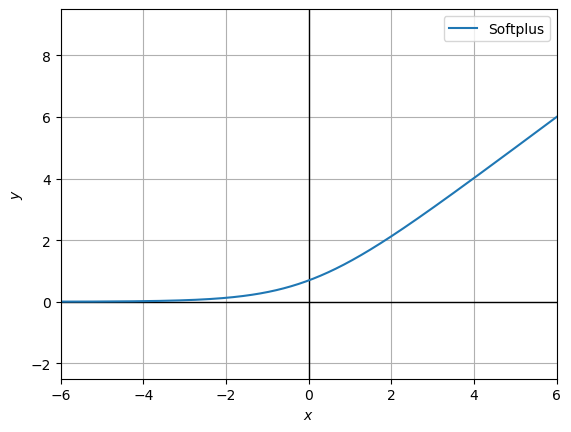

In [35]:
Plot(x, softplus(x), "Softplus", xlim=[-6, 6], ylim=[-2.5, 9.5])

### Derivative

$$ Softplus': f'(x) = \sigma(x)$$

In [36]:
def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))

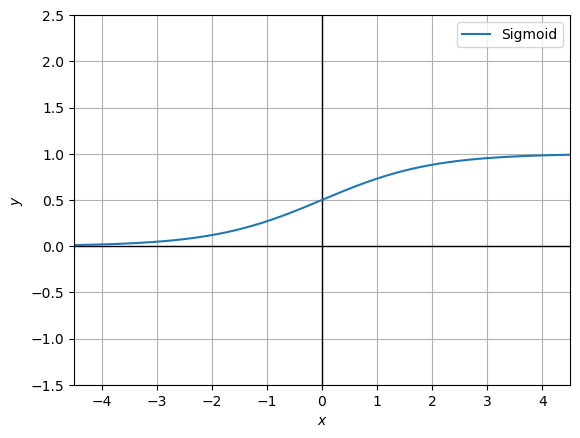

In [37]:
Plot(x, softplus_derivative(x), "Sigmoid", xlim=[-4.5, 4.5], ylim=[-1.5, 2.5])

# Loss Functions

## $\text{BCE}$

In [38]:
y1_bin = np.random.rand(32, 1000, 5)
y2_bin = np.round(np.random.rand(32, 1000, 5))

In [39]:
def BinaryCrossEntropy(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.clip(np.log(y_pred + 1e-7), -100, 100) + (1 - y_true) * np.clip(np.log(1-y_pred + 1e-7), -100, 100), axis=0)) / y_pred.shape[0]


In [40]:
torch.nn.functional.binary_cross_entropy(torch.tensor(y1_bin), torch.tensor(y2_bin))

tensor(1.0021, dtype=torch.float64)

In [41]:
BinaryCrossEntropy(y1_bin, y2_bin)

1.0021276617268458

In [42]:
BinaryCrossEntropy(np.array([0.5]), np.array([1]))

0.6931469805599654

### Graph

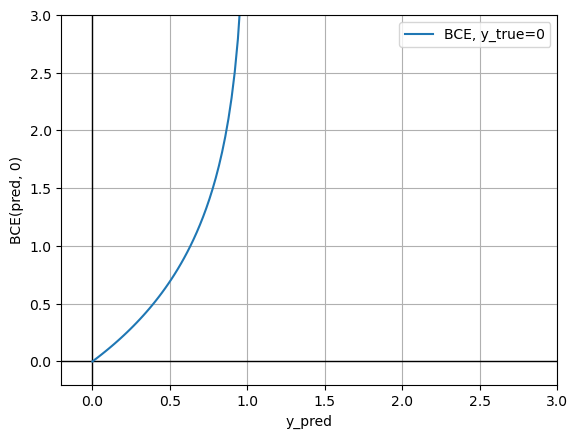

In [43]:
x = np.linspace(0, 1, 50)
y = [BinaryCrossEntropy(np.array([i]), np.array([0])) for i in x]

Plot(x, y, "BCE, y_true=0", xlim=[-0.2, 3], ylim=[-0.2, 3], x_label='y_pred', y_label='BCE(pred, 0)')

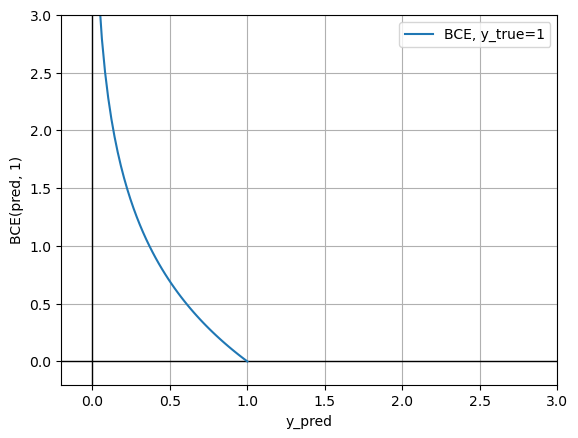

In [44]:
y = [BinaryCrossEntropy(np.array([i]), np.array([1])) for i in x]

Plot(x, y, "BCE, y_true=1", xlim=[-0.2, 3], ylim=[-0.2, 3], x_label='y_pred', y_label='BCE(pred, 1)')

## $\text{MSE}$

In [45]:
y1 = np.random.rand(8, 100, 150, 4) * 10 - 5
y2 = np.random.randn(8, 100, 150, 4) * 15 - 7.5

In [46]:
def mse(y_pred, y_true):
    return np.mean(np.sum((y_true - y_pred) * (y_true - y_pred), axis=0)) / y_pred.shape[0]

In [47]:
print(mse(y1, y2))

289.9027830355052


In [48]:
torch.nn.functional.mse_loss(torch.tensor(y1), torch.tensor(y2))

tensor(289.9028, dtype=torch.float64)

## $\text{MAE}$

$$ \text{MAE}(y, \hat y) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat y_i|$$

In [49]:
def mae(y_pred, y_true):
    return np.mean(np.sum(np.abs(y_true - y_pred), axis=0)) / y_pred.shape[0]

In [51]:
torch.nn.functional.l1_loss(torch.tensor(y1), torch.tensor(y2))

tensor(13.6385, dtype=torch.float64)

In [52]:
mae(y1, y2)

13.638497878507575